# Data Science Final Project

By Vivian Shu Yi Li and Lilian Uong

DS 2001: Programming Practicum

April 14, 2022

## Problem Statement and Background			
Our problem statement is to investigate the correlation between an olympian’s age and the number of different types of medals they won. Our hypothesis was that younger athletes in their twenties would win more medals as opposed to older athletes in their thirties and forties since their bodies are in better condition. We found a csv file from Kaggle regarding the statistics of Olympic athletes ranging from 1896 to 2016. In the dataset, we are given name, age, gender, weight, height, team, country, type of sports, the event, year, season, city (where the olympics is held), and types of medals. However, not all of this data was utilized to complete our investigation. In our project, we only focused on the United States’ athletes and their data. 


## Introduction and Description of the Data

During the selection process for a database, the Olympics was a raging topic on the Internet and amongst the public. Since it is a globally shared event that brings so many communities together, we thought it would be interesting to find whether or not there is a trend between the athletes and their winnings. Our project would especially seem riveting to those who are interested in the Olympics and to those who may want to participate in the Olympic games themselves. This problem concerns future Olympic athletes and their trainers. By discovering a pattern in the database, we will be able to predict the statistics that give an athlete a higher chance of winning. This discovery, in turn, can help Olympic trainers develop better training strategies and habits for their athletes in order to increase their chances of obtaining a medal.


## Part 1:  Correlation between the Athlete’s age and the number of medals

### Step 1: Importing useful packages and loading data
We used pandas because it is faster and more efficient in conducting quantitative analysis, especially when dealing with larger datasets and timeframes. Numpy allows us to graph the datas easier too.

### Import the matplotlib package to do visualization


In [1]:
# import packages to organize data
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# read the file
data = pd.read_csv("athlete_events.csv")    

Since we are only focusing on the US team, we created a new dataset with just the US data. To do so, we used .loc to find the rows that only has Team USA. Then, we create a new variable for that data set.

In [3]:
# create a list of all US data only
US_data = data.loc[data["Team"]== "United States"]

Within the US data, we are only focusing on the age and the medals. Therefore, we used the groupby function to organize all the datas by age.

In [4]:
# use groupby function - group by age
grouped = US_data.groupby("Age")

In [5]:
# test out to make sure the 
print(grouped)

### Step 2: Computation


In [6]:
# create list for each medal categories and for age and total
goldl = []
silverl = []
bronzel = []
agel = []
total = []

The groupby function allows us to perform a certain action for each group. Within each age, we used a for loop to count the numbers of different types of medals in each age group. Afterwards, we added them into their respective categories in lists. 

In the codes below, we are running the following:
For the group name (age), column (which contains the actual rows), iterate each rows under the Medal column.
If the condition is satisfy, perform the following actions.
    

In [7]:
# use a for loop function to find the number of medals in each categories and the age they correspond to
for age, medal in grouped:
    # round age to the nearest whole number
    age = round(age)
    
    # create inital values for each category
    gold = 0
    silver = 0
    bronze = 0
    medals = 0
    
    # use conditional statements to iterate by rows (rows in the Medal column)
    for i, row in medal.iterrows():
        medal = row["Medal"]
        if medal == "Gold":
            gold += 1
            medals += 1
            
        elif medal == "Silver":
            silver += 1
            medals += 1
            
        elif medal == "Bronze":
            bronze += 1
            medals += 1
            
            
    # append the values into respective dictionaries and lists
    total.append(medals)
    goldl.append(gold)
    silverl.append(silver)
    bronzel.append(bronze)
    agel.append(age)
    

###  Step 3: Communication
In this step, we will print out the lists of age, gold, silver, bronze, and the total number of medals

In [8]:
# print out the lists
print("This is the categories by list...")
print("Age:", agel, "\n")
print("Gold:", goldl, "\n")
print("Silver:", silverl, "\n")
print("Bronze:", bronzel, "\n")
print("# of Medals:", total, "\n")

This is the categories by list...
Age: [12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 70, 71, 73, 74, 75, 77, 88, 96, 97] 

Gold: [0, 3, 9, 24, 41, 68, 85, 152, 179, 248, 263, 257, 190, 172, 143, 138, 99, 76, 64, 45, 36, 36, 26, 21, 15, 8, 10, 12, 11, 5, 8, 2, 8, 2, 3, 2, 2, 4, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 

Silver: [1, 0, 7, 12, 34, 20, 52, 79, 94, 122, 130, 148, 129, 122, 100, 101, 75, 48, 50, 35, 27, 18, 18, 17, 13, 6, 7, 7, 7, 3, 0, 0, 1, 2, 2, 1, 2, 2, 0, 0, 1, 0, 0, 2, 0, 1, 2, 1, 1, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0] 

Bronze: [0, 1, 4, 7, 13, 28, 47, 56, 76, 117, 111, 96, 105, 90, 75, 77, 51, 58, 36, 27, 30, 21, 10, 16, 9, 11, 8, 4, 9, 5, 4, 6, 3, 1, 2, 1, 3, 6, 0, 1, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,

### Stacked bar
To compare the overall total medals won by each group, we decided to create a stacked bar plot. The Stacked bar will indicate our findings. In each bar, it will show the number of medals in gold, silver, and bronze. The ages reflect the x values, while the total number of medals from each category, in which its position corresponds to age’s position, represents the y values. Then, we labeled the axes, created a title and legend, and adjusted the size of the chart.

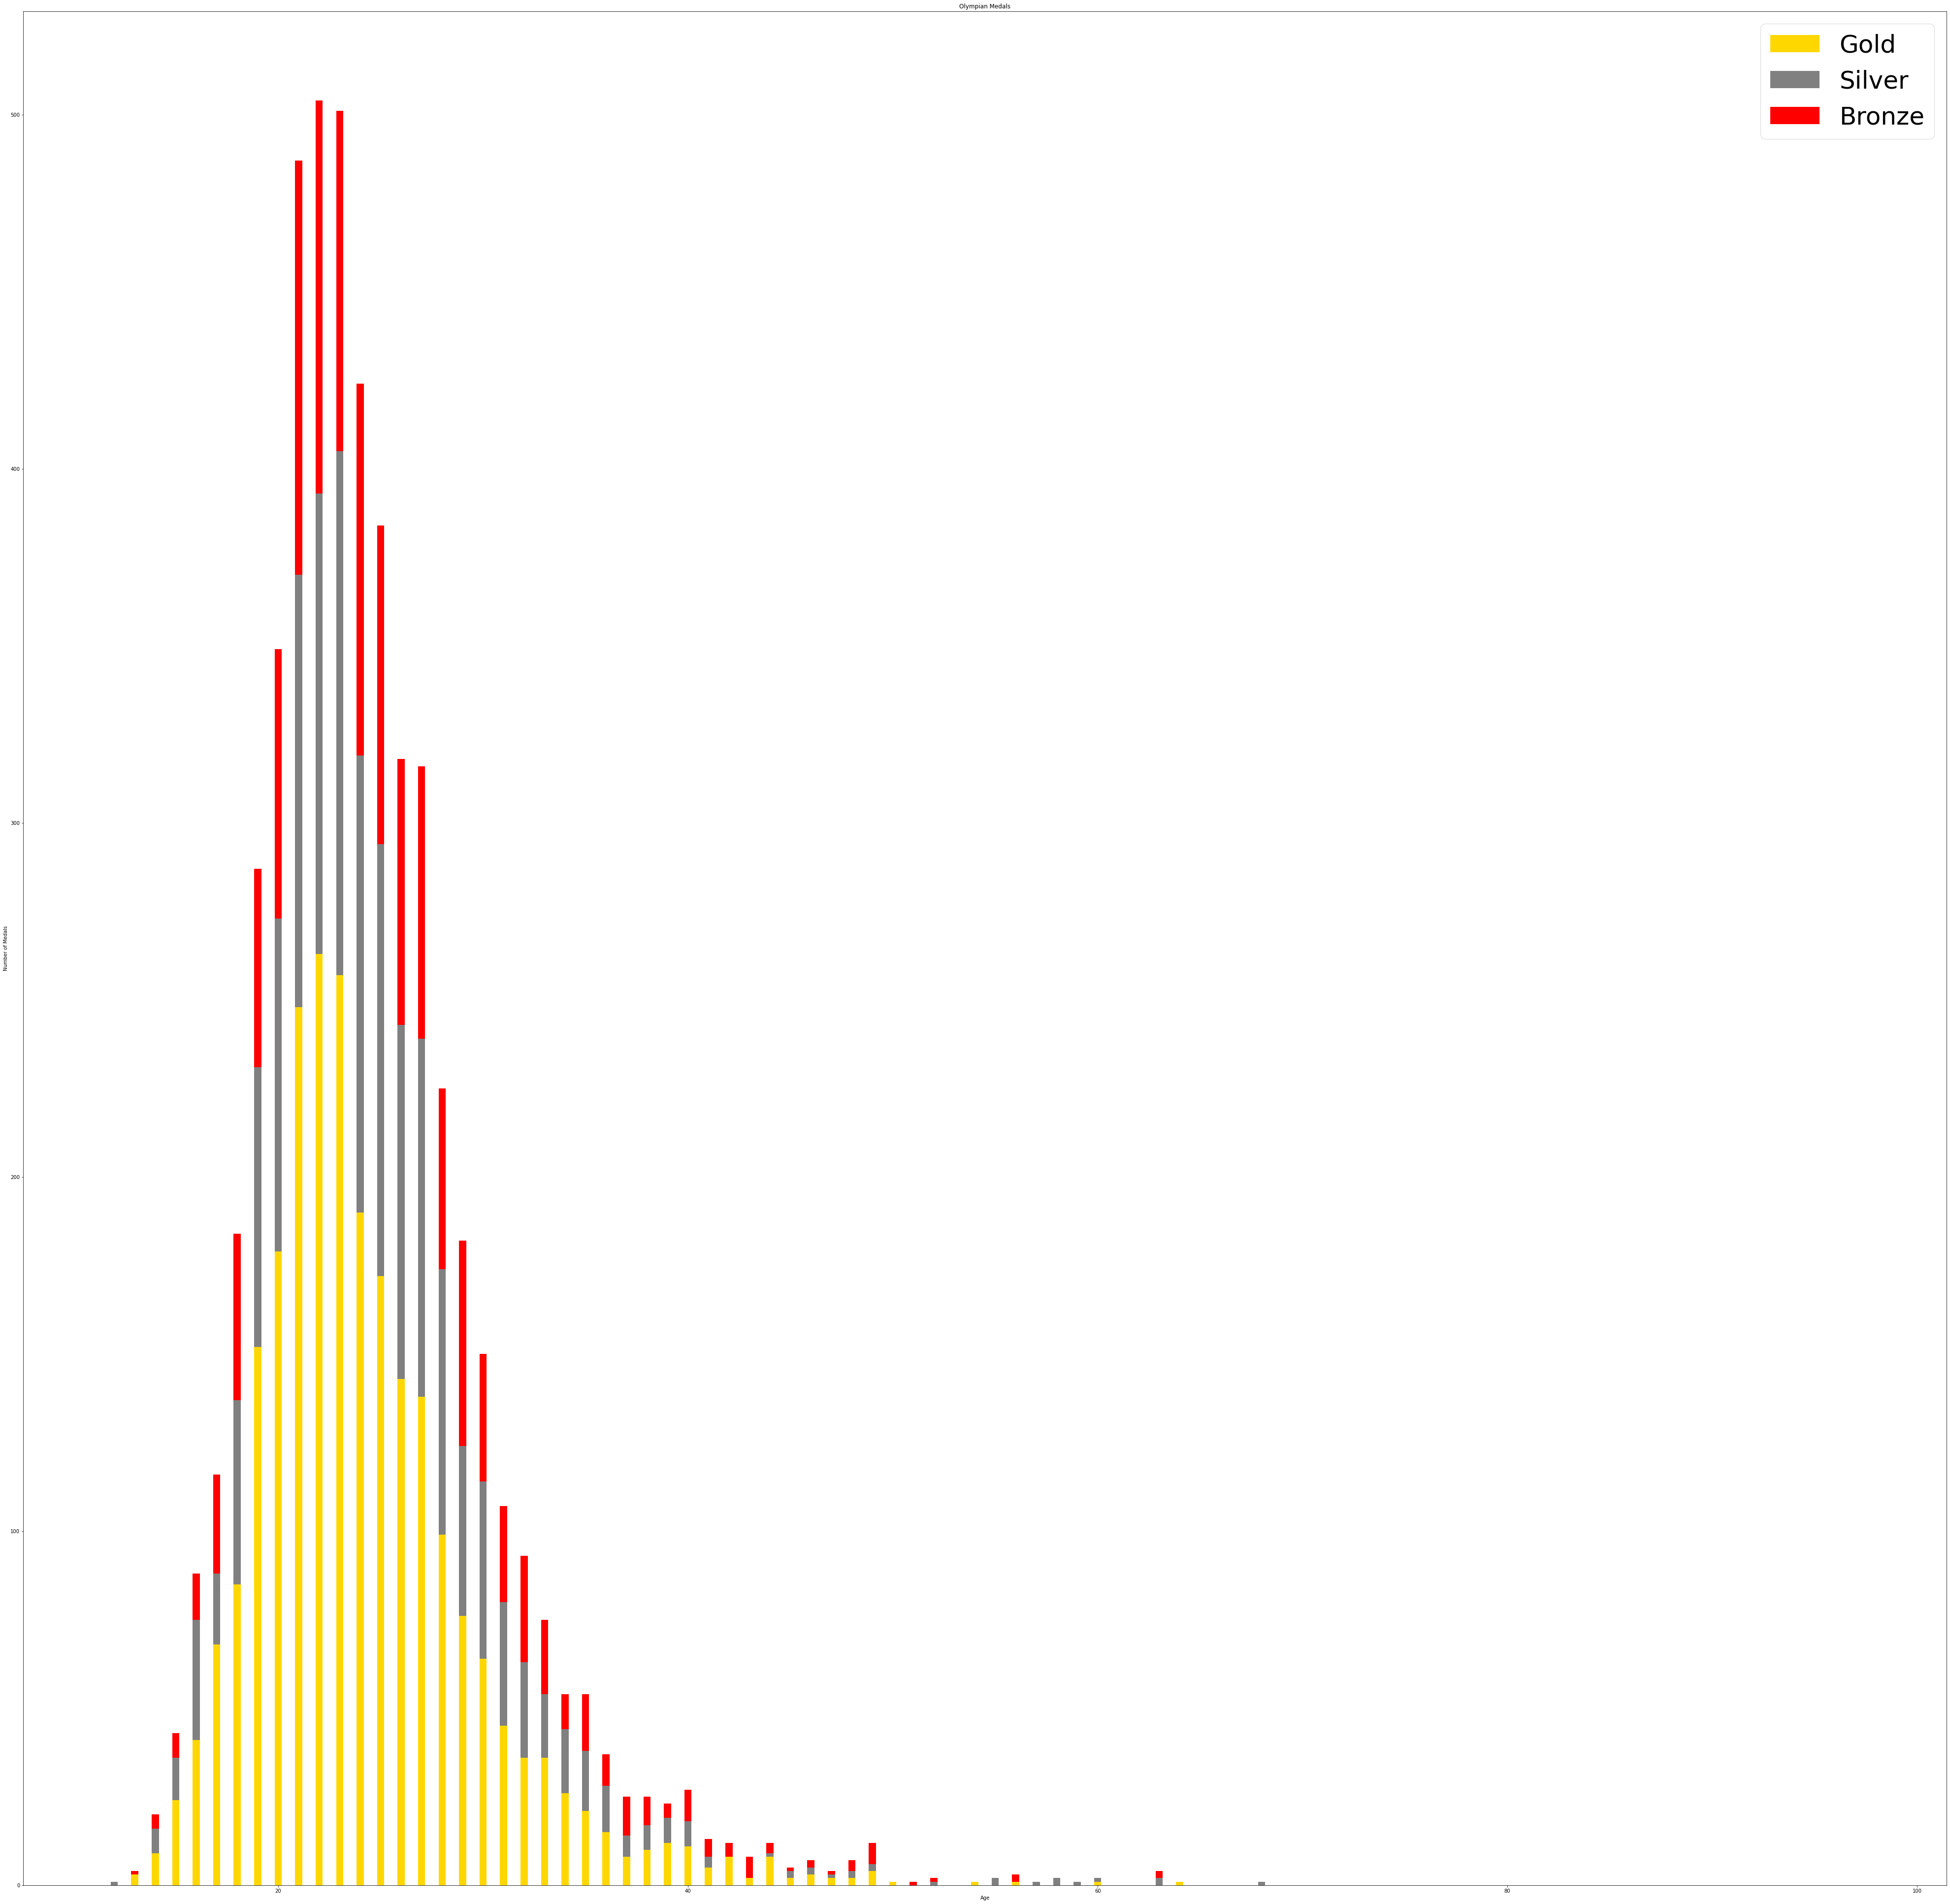

In [9]:
# create a stacked bar plot to present the data
# use np.array for each list and save them as new variables 
x = agel
y1 = np.array(goldl)
y2 = np.array(silverl)
y3 = np.array(bronzel)

# plot the variables and label all parts of the chart
plt.figure(figsize = (70,70))
plt.bar(x, y1, width = 0.35, label = "Gold", color = "gold")
plt.bar(x, y2, width = 0.35, label = "Silver", color = "gray", bottom = y1)
plt.bar(x, y3, width = 0.35, label = "Bronze", color = "red", bottom = y1+y2)
plt.ylabel("Number of Medals")
plt.xlabel("Age")
plt.title("Olympian Medals")
plt.rcParams['font.size'] = 50
plt.legend()
plt.show()

As you can see in the stacked bar, it is too crowded too see the exact value of the medals. Therefore, we created a table. The table of dataframe using pandas will indicate all the values of each type of medals. We added all the lists into a dictionary in order to create the visualization. The resulting table allows the viewers to check the numbers of medals won by each age.

In [10]:
# create a dictionary and add all the list categories into it
all_medals = {}
all_medals["Age"] = agel
all_medals["Gold"] = goldl
all_medals["Silver"] = silverl
all_medals["Bronze"] = bronzel
all_medals["Medals"] = total

In [11]:
# create a dataframe using pandas to display the number of different types of medals each age won 
df = pd.DataFrame(all_medals, columns = ["Age", "Gold", "Silver", "Bronze", "Medals"])
pd.set_option('display.max_rows', None)
df

,Age,Gold,Silver,Bronze,Medals
0,12,0,1,0,1
1,13,3,0,1,4
2,14,9,7,4,20
3,15,24,12,7,43
4,16,41,34,13,88
5,17,68,20,28,116
6,18,85,52,47,184
7,19,152,79,56,287
8,20,179,94,76,349
9,21,248,122,117,487


## Result for part 1
Based on our stacked bar chart, we discovered that there was indeed a pattern. As the athletes’ age increases, the likelihood of them winning a medal also increases. However, after the peak age of 22, the likelihood of the athletes winning decreased. Therefore, we can reach a conclusion that younger athletes with extensive training typically win more medals than older athletes. The main reason for this besides training could be because of better and healthier body conditions. 


# Part 2: Logistics Regression

In [12]:
pip install -U imbalanced-learn # orevents oversampling of the data

Note: you may need to restart the kernel to use updated packages.


In [13]:
# import packages regarding imblearn
from imblearn.over_sampling import RandomOverSampler
from sklearn.datasets import make_classification
from collections import Counter

In [14]:
# import packages for logistics regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

In [15]:
# replace "NaN" values with 0 so there are no missing values
data2 = data.replace(np.nan, 0)

In [16]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     271116 non-null  float64
 4   Height  271116 non-null  float64
 5   Weight  271116 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   271116 non-null  object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [17]:
data2.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,0
2,3,Gunnar Nielsen Aaby,M,24.0,0.0,0.0,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,0
3,4,Edgar Lindenau Aabye,M,34.0,0.0,0.0,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,0


In [18]:
data2.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,271116.000000,271116.000000,271116.000000,271116.000000
mean,68248.954396,24.663827,136.424553,54.305674,1978.378480
std,39022.286345,7.840652,73.450560,32.381492,29.877632
min,1.000000,0.000000,0.000000,0.000000,1896.000000
25%,34643.000000,21.000000,157.000000,47.000000,1960.000000
50%,68205.000000,24.000000,171.000000,64.000000,1988.000000
75%,102097.250000,28.000000,180.000000,75.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


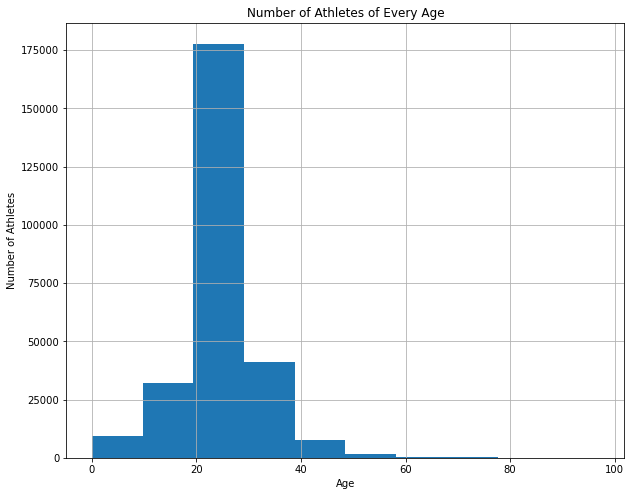

In [33]:
# create a histogram that shows how many athletes are of each age
plt.figure(figsize = (10,8))
data2["Age"].hist(bins=10)
plt.rcParams['font.size'] = 10
plt.xlabel("Age")
plt.ylabel("Number of Athletes")
plt.title("Number of Athletes of Every Age")
plt.show()

In [20]:
# check to see if there are any missing  values in the dataset
data2.isnull().sum()

ID        0
Name      0
Sex       0
Age       0
Height    0
Weight    0
Team      0
NOC       0
Games     0
Year      0
Season    0
City      0
Sport     0
Event     0
Medal     0
dtype: int64

In [21]:
# shows the correlation between five of the columns within the dataset
data2.corr()

,ID,Age,Height,Weight,Year
ID,1.000000,0.000555,0.011114,0.010938,0.011885
Age,0.000555,1.000000,0.086514,0.114378,0.094453
Height,0.011114,0.086514,1.000000,0.899466,0.652054
Weight,0.010938,0.114378,0.899466,1.000000,0.622125
Year,0.011885,0.094453,0.652054,0.622125,1.000000


A new column with the binary values 0 and 1 must be created from the "Medal" column in order to set it as the y-variable in the logistics regression model later on.


In [22]:
for i, row in US_data.iterrows():
    if (US_data["Medal"][i] == "Gold") or (US_data["Medal"][i] == "Silver") or (US_data["Medal"][i] == "Bronze"):
        US_data.at[i, "Medals Won"] = 1
    else:
        US_data.at[i, "Medals Won"] = 0

/Users/vivian/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/Users/vivian/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [23]:
# check the new dataset to make sure it is data only on the USA team and if the new column was implemented correctly
US_data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Medals Won
10,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 10 kilometres,NaN,0.0
11,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 50 kilometres,NaN,0.0
12,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 10/15 kilometres Pu...,NaN,0.0
13,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 4 x 10 kilometres R...,NaN,0.0
14,6,Per Knut Aaland,M,33.0,188.0,75.0,United States,USA,1994 Winter,1994,Winter,Lillehammer,Cross Country Skiing,Cross Country Skiing Men's 10 kilometres,NaN,0.0


We chose the age, height, and weight columns as the predictors and the "Medals Won" as the variable being predicted.

In [24]:
x = US_data[["Age", "Height", "Weight"]]
y = US_data[["Medals Won"]]

To compensate for our data having an imbalance of values from the majority and minority class, we had to undergo random oversampling in order for our logistics regression model to work properly.


In [25]:
# the data has a class imbalance with the majority class representing 9,900 values out of 10,000
x, y = make_classification(n_samples = 10000, weights = [0.99], flip_y = 0)

In [26]:
# allows the minority class to represent the same amount of values has the majority class
oversample = RandomOverSampler(sampling_strategy = "minority")

In [27]:
# fit and transforms the data into one that has a balanced majority and minority class
x_over, y_over = oversample.fit_resample(x, y)

In [28]:
# split the data into training and testing
x_train, x_test, y_train, y_test = train_test_split(x_over, y_over, test_size = 0.2, random_state = 42)

In [29]:
# create a logistic regression object and fit the model with training data
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

# make predictions based on the x variables from the dataset
y_pred = log_reg.predict(x_test)

In [30]:
# compute the precision score to see how accurate our predicted results (y_pred) compares to the actual results (y_test)
# compute the recall score to see the model's ability to correctly predict the positive samples
# compute the f1 score to see the quality of our model (the closer to 1, the better)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_pred)}")
print(f"ACCURACY SCORE:\n{accuracy_score(y_test, y_pred):.4f}")
print(f"CLASSIFICATION REPORT:\n\tPrecision: {precision:.4f}\n\tRecall: {recall:.4f}\n\tF1 Score: {f1:.4f}")

CONFUSION MATRIX:
[[1872  129]
 [   0 1959]]
ACCURACY SCORE:
0.9674
CLASSIFICATION REPORT:
	Precision: 0.9382
	Recall: 1.0000
	F1 Score: 0.9681


## Results for part 2:
Since we had to utilize RandomOverSampler, our results came out slightly different every time we ran it. In order to present our findings, we decided to run the code ten times and found the averages. The average accuracy score was 0.93442. The average precision score was 0.92817. The average recall score was 0.93708. The average f1 score was 0.93237. Seeing how each of our averages came out to be in the 0.9 range, our model was relatively accurate. Out of 3,960 observations, 3831 was classified correctly with an accuracy of 93.82%.


## Strengths and Weaknesses
During the process of our project, we found our strength to be centered around our visualizations. We were able to produce neat, clear, and organized graphs. Our graphs were also easy to read and understand, making it straightforward for those who have limited knowledge about the Olympics and our project. However, we faced a lot of shortcomings along the way as well. For one, we underestimated the size of our dataset and our ability to code through all of it. Our initial rationalization was that the more data we had, the more accurate our results would be. This actually became counterproductive because the size of our data actually prevented us from implementing the many other ideas we had. For instance, we wanted each bar stack to indicate their value, as in, each stack would indicate the number of medals within its respective category. We also wanted to create a function where users could input an age, height, and weight to predict whether or not those statistics would win a medal. If we had one more time, we would have looked into how we could have organized the data better in order to make more specific predictions. We also would have made visualizations that would answer other questions outside of our problem statement such as whether a season or sport performed better than the other.


## Citations
Griffin, R. (2018). 120 years of Olympic history: athletes and results, Version 2. Retrieved March 05, 2022 from https://www.kaggle.com/datasets/heesoo37/120-years-of-olympic-history-athletes-and-results.


Brownlee, Jason. "Random Oversampling and Undersampling for Imbalanced Classification." *Machine Mastery Learning*. 15 Jan. 2020. Accessed 12 Apr. 2022. https://machinelearningmastery.com/random-oversampling-and-undersampling-for-imbalanced-classification/
